In [63]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

In [64]:
# Importing the dataset
bookingData = pd.read_csv('C:\Rishi\Manipal\Assignment\TB_Data.csv', encoding="Latin")

In [65]:
# Understanding dataset
bookingData.shape
bookingData.head()

,BookingStatus,Wno,ClassOfTravel,JourneyDate,Weekdays,Month,Days,Astatus
0,WL,9,3A,2/12/2016,6,12,2,1
1,WL,3,3A,1/12/2016,5,12,1,1
2,WL,1,2A,3/12/2016,7,12,3,0
3,WL,67,SL,3/12/2016,7,12,3,0
4,WL,61,SL,3/12/2016,7,12,3,0


In [66]:
# Checking any null entry in dataset
print(bookingData.isnull().sum(axis=0))

BookingStatus    0
Wno              0
ClassOfTravel    0
JourneyDate      0
Weekdays         0
Month            0
Days             0
Astatus          0
dtype: int64


In [67]:
# Printing columns of dataset
print(bookingData.columns)

Index(['BookingStatus', 'Wno', 'ClassOfTravel', 'JourneyDate', 'Weekdays',
       'Month', 'Days', 'Astatus'],
      dtype='object')


In [68]:
# Removing not necessart data from dataset
bookingData=bookingData.drop(['JourneyDate'], axis =1)

In [69]:
# Printing columns of dataset after dropping unnecessary column
print(bookingData.columns)

Index(['BookingStatus', 'Wno', 'ClassOfTravel', 'Weekdays', 'Month', 'Days',
       'Astatus'],
      dtype='object')


In [70]:
# Print the unique value in column BookingStatus, ClassOfTravel
print(bookingData['BookingStatus'].unique())
print(bookingData['ClassOfTravel'].unique())

['WL' 'TQWL']
['3A' '2A' 'SL']


In [71]:
# Convert string value of BookingStatus into Number
bookingData.BookingStatus[bookingData.BookingStatus == 'WL'] = 0
bookingData.BookingStatus[bookingData.BookingStatus == 'TQWL'] = 1
bookingData.BookingStatus = bookingData.BookingStatus.astype('int')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
# Convert string value of ClassOfTravel into Number
bookingData.ClassOfTravel[bookingData.ClassOfTravel == '3A'] = 0
bookingData.ClassOfTravel[bookingData.ClassOfTravel == '2A'] = 1
bookingData.ClassOfTravel[bookingData.ClassOfTravel == 'SL'] = 2
bookingData.ClassOfTravel = bookingData.ClassOfTravel.astype('int')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [73]:
#Split into independent and dependent variable
X=bookingData[['BookingStatus', 'Wno', 'ClassOfTravel', 'Weekdays', 'Month', 'Days']]
y=bookingData.Astatus

In [74]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
# Compute with RandomForest classification
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=4, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

print('Accuracy = {:.2f}'.format(classifier.score(X_test,y_test)))

Accuracy = 0.80


In [76]:
# Calculating accuracy of model

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[481  20]
 [110  34]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       501
           1       0.63      0.24      0.34       144

   micro avg       0.80      0.80      0.80       645
   macro avg       0.72      0.60      0.61       645
weighted avg       0.77      0.80      0.76       645

0.7984496124031008


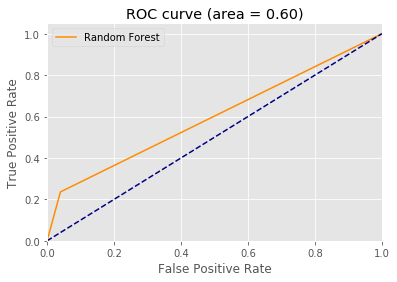

In [77]:
# Plot the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Random Forest')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="best")
plt.show()